In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)


Python version: 3.7.13
Tensorflow version: 2.8.0
Keras version: 2.8.0


Imported all the necessary dependencies as well as selecting tensorflow version 2. 

In [2]:
%load_ext tensorboard

!rm -rf ./.logs/

mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In the above chunk, I noticed that this dataframe is a feature of the first object in the `x_train` dataset. 

Adding the Color Channels in the chunk below. 

In [7]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)



The only operation that was done in this chunk was to apply the color channel. Recall that the color channel is the channel that adds the red, green, and blue colors to images. The color channel helps us to extract important features from an image such that we may train a model to detect edges, shapes, and more importantly which color was used when in the original image. This is a *very* important operation when working with image data. 

In [8]:
print('x_train_with_chanels:', x_train_with_chanels.shape) #reshaped matrix with the color channel added in the training dataset.
print('x_test_with_chanels:', x_test_with_chanels.shape) #respahed matrix with the color channel added in the testing dataset. 

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [9]:
x_train_normalized = x_train_with_chanels / 255 #grayscale normalization. Recall that images are on a fixed integer value from 0 to 255. 
x_test_normalized = x_test_with_chanels / 255 

x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

**Question 1**

The only fine-tuning that I performed on the model were just some regularizations and a mild increse in the dropout to achieve a more robust fit overall. This was my main focs. While the test accuracy of my model is slightly worse, 99.02% as compared to 99.14%, but I was satisfied with these results. 

In [46]:
model = tf.keras.models.Sequential()

from keras import regularizers

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size = 5,
    filters = 8,
    strides = 1,
    activation = tf.keras.activations.relu,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
    
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size = 5,
    filters = 16,
    strides = 1,
    activation = tf.keras.activations.relu,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units = 128,
    activation=tf.keras.activations.relu,
    kernel_regularizer = regularizers.l1(l1 = 0.0001)
));

## I added a kernel regularizer to the dense layer. 

model.add(tf.keras.layers.Dropout(0.25))

## I increased the dropout to 25% 

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax,
    kernel_initializer = tf.keras.initializers.VarianceScaling(),
));



adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs = 50,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

# I also decided to train the model for 50 epochs to clearly illustrate the robust fit that I was able to achieve when changing those parameters. 


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3539 - accuracy: 0.9366 - val_loss: 0.1768 - val_accuracy: 0.9806
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1753 - accuracy: 0.9770 - val_loss: 0.1305 - val_accuracy: 0.9861
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1393 - accuracy: 0.9811 - val_loss: 0.1202 - val_accuracy: 0.9856
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1203 - accuracy: 0.9839 - val_loss: 0.1073 - val_accuracy: 0.9858
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126 - accuracy: 0.9847 - val_loss: 0.0963 - val_accuracy: 0.9887
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1062 - accuracy: 0.9858 - val_loss: 0.0936 - val_accuracy: 0.9875
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1020 - accuracy: 0.9866 - val_loss: 0.0919 - val_accuracy:

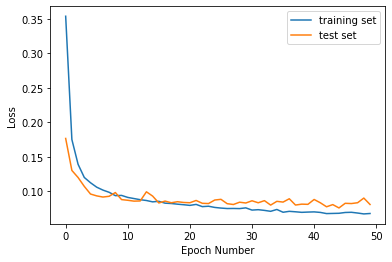

In [47]:

## Plotting the curves for loss on the training and test sets. 

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()



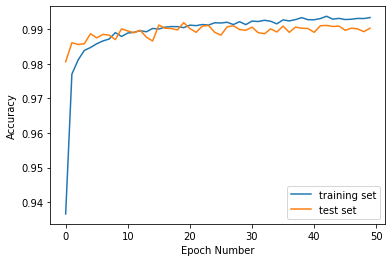

In [48]:
## PLotting the curves for accuracy on the training and test sets. 

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()



From the plots above, it is clear that retraining the model could improve the model performance. The plots themselves indicate that 11 epochs ought to achieve a robust fit. The following chunk is for the retraining of the model. 

In [223]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)


In [224]:
print("Training loss: ", train_loss)
print("Training accuracy: ", train_accuracy)

Training loss:  0.057407770305871964
Training accuracy:  0.9968500137329102


In [225]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [226]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.0811387449502945
Validation accuracy:  0.9902999997138977


In [227]:
model.evaluate(x_test_normalized, y_test)
## I managed to achieve a fairly robust fit overall and am pleased with the results! 


313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9903


[0.0811387449502945, 0.9902999997138977]

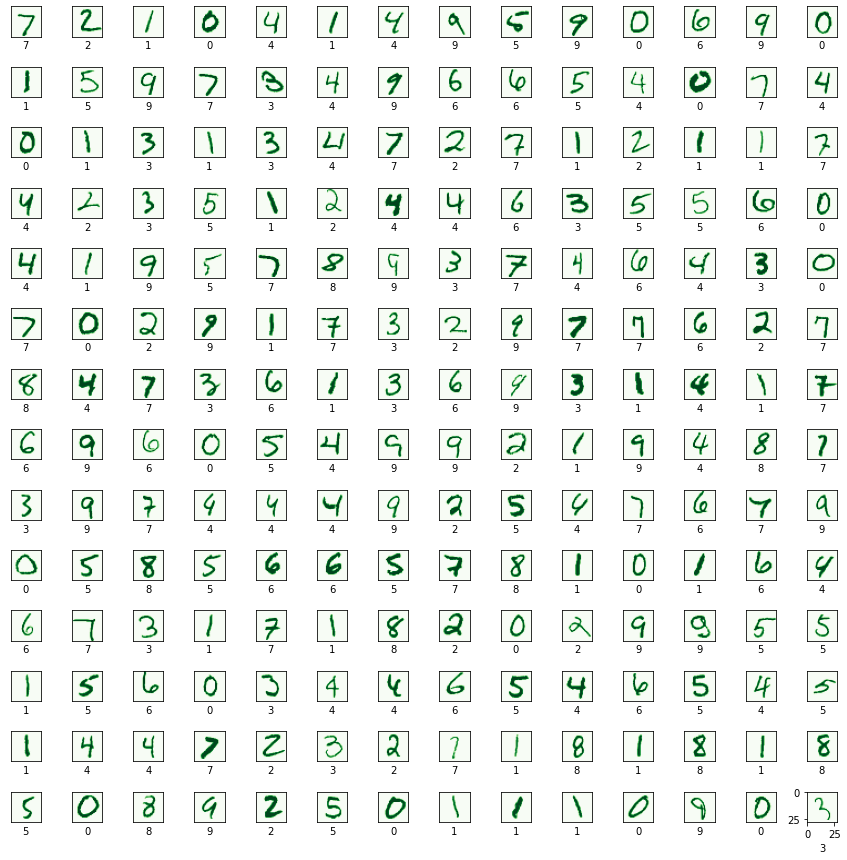

In [228]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.show()

19248


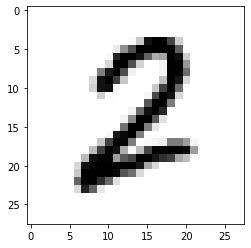

In [235]:
import random

abc = random.randint(10, 20000)
print(abc)

# Generating a random integer for question 2. I though that using a seed would be unneccesary. 

input_data_q2 = x_train[abc]

plt.imshow(input_data_q2, cmap = plt.cm.binary)

# Displaying the image that this randomly generated integer would produce. 


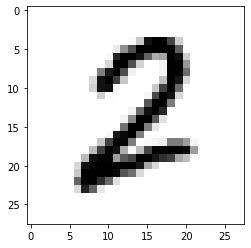

In [236]:
from scipy.signal import convolve2d

np.zeros(shape = ())

iden = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

x_iden = convolve2d(input_data_q2, iden, mode = "same")
plt.imshow(x_iden, cmap = plt.cm.binary)


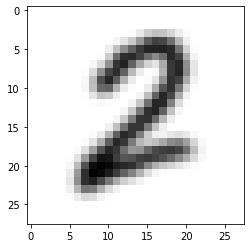

In [237]:
Gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * (1/16)


x = convolve2d(input_data_q2, Gaussian, mode = "same")
plt.imshow(x, cmap = plt.cm.binary)

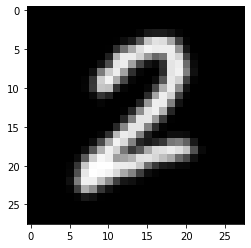

In [238]:
sharpen = np.array([[0, -1, 0],
                    [-1, -5, -1],
                   [0, -1, 0]])

sharp_x = convolve2d(input_data_q2, sharpen, mode = "same")
plt.imshow(sharp_x, cmap = plt.cm.binary)


Note that the sharpened image *really* increased the contrast. This was the act of sharpning. In fact, the edges of the value 2 are more clearly pronounced than they were in the original image! 